In [1]:
import xarray
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
import dask
import warnings

In [1]:
print("ola")

ola


In [17]:
#define which datasets to import
# pairs of same inner and outer steps changing the grid from fine to coarse

models = [
    {
        "name" : "1080x256_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "1080x256",
        "plot_style" : "--c"
    },

    {
        "name" : "256x64_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "256x64",
        "plot_style" : "--k"
    },
    
    {
        "name" : "64_8_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "64x8"
    }
    
]

# models = [
#     {
#         "name" : "dns_2048x512",
#         "kill_factor" : 1,
#         "legend" : "dns_2048x512",
#         "plot_style" : "--c"
#     },
    
#     {
#         "name" : "dns_1024x256",
#         "kill_factor" : 1,
#         "legend" : "dns_1024x256",
#         "plot_style" : "--c"
#     },
    
    
#     {
#         "name" : "dns_256x64",
#         "kill_factor" : 1,
#         "legend" : "dns_256x64",
#         "plot_style" : "--k"
#     },
    
# #     {
# #         "name" : "LI_256x64",
# #         "kill_factor" : 1,
# #         "legend" : "LI_256x64"
# #     },
    
    
#     {
#         "name" : "dns_64x16",
#         "kill_factor" : 1,
#         "legend" : "dns_64x16"
#     },
    
    
# #     {
# #         "name" : "LI_64x16",
# #         "kill_factor" : 1,
# #         "legend" : "LI_64x16"
# #     },
    
    

    
    
    
    
    
# ]

rows = len(models)
columns = 4

In [15]:
ds = xarray.open_dataset(f'./datasets/'+"256x64_150_seconds_inner_1" +'.nc', chunks={'time': '100MB'})

In [39]:
ds.u[0][10]

<xarray.DataArray 'u' (x: 256, y: 64)>
dask.array<getitem, shape=(256, 64), dtype=float32, chunksize=(256, 64), chunktype=numpy.ndarray>
Coordinates:
    time     float64 0.1719
  * x        (x) float32 0.01562 0.04688 0.07812 0.1094 ... 7.922 7.953 7.984
  * y        (y) float32 0.01562 0.04688 0.07812 0.1094 ... 1.922 1.953 1.984
    sample   int32 0

In [18]:
## calculate and plot vorticity
def vorticity(ds):
  return (ds.v.differentiate('x') - ds.u.differentiate('y')).rename('vorticity')

In [44]:
def plot_var(models,rows,columns,var,figsize=(15,12)):
    fig, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.1)


    axs = axs.ravel()
    
    axis = 0
    for model in models:
        model_name = model['name']
        kill_factor = model['kill_factor']
        label = model['legend']
        ds = xarray.open_dataset(f'./datasets/'+ model_name +'.nc', chunks={'time': '100MB'})
#         ds = xarray.open_dataset(f'./../hybrid_model/sims_50_seconds/'+ model_name +'.nc', chunks={'time': '100MB'})
#         ds = ds.isel(sample = 0)
        outer_steps = len(ds.time)
        
        total_sim_time = max(ds.time.values)*kill_factor
        seconds_warm_up = 5
        warm_up = int(seconds_warm_up * (outer_steps/total_sim_time)) #this allows us to start plotting after a set number of seconds
        
#         warm_up = int(outer_steps*kill_factor//(columns-1))-1 #0
        
        
#         print((outer_steps*kill_factor-warm_up))
#         print(int((outer_steps*kill_factor-warm_up)//(columns-1)-1))
        if var == 'vorticity':
            vort = ds.pipe(vorticity)
        
        for time_slice in range(warm_up,int(np.floor(outer_steps*kill_factor)),int((outer_steps*kill_factor-warm_up)//(columns-1)-1)):
#         for time_slice in range(5):
            if var == 'u':
                field_var = ds.u[0][time_slice]
            elif var == 'v':
                field_var = ds.v[0][time_slice]
            elif var == 'vorticity':
                field_var = vort[0][time_slice]
            
            im = xarray.plot.pcolormesh(field_var, 'x', 'y',add_colorbar = False,cmap=seaborn.cm.rocket,ax = axs[axis],robust=True);
            axs[axis].title.set_text('time: ' + "{:.1f}".format(ds.time[time_slice]))
#             axs[axis].axis('off')
            
    
            ## Plots colorbar at the last subplot for each model
#             if (axis+1) % columns == 0:
#                 cbar = fig.colorbar(im, ax=axs[axis], shrink=1)
            

            #remove vorticity from y axis of each subplot
            axis += 1
    
#         print(max(field_var.values.flatten()))
    for i in range(len(models)):
        label = models[i]['legend']
        axs[i*columns].set_ylabel(label, rotation=90, size='large')
        
    
    fig.tight_layout()
    
    ## Plots general colorbar 
    cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)
    cbar.set_label(var, rotation=0, size='large')
    
        
    
    plt.show()
    


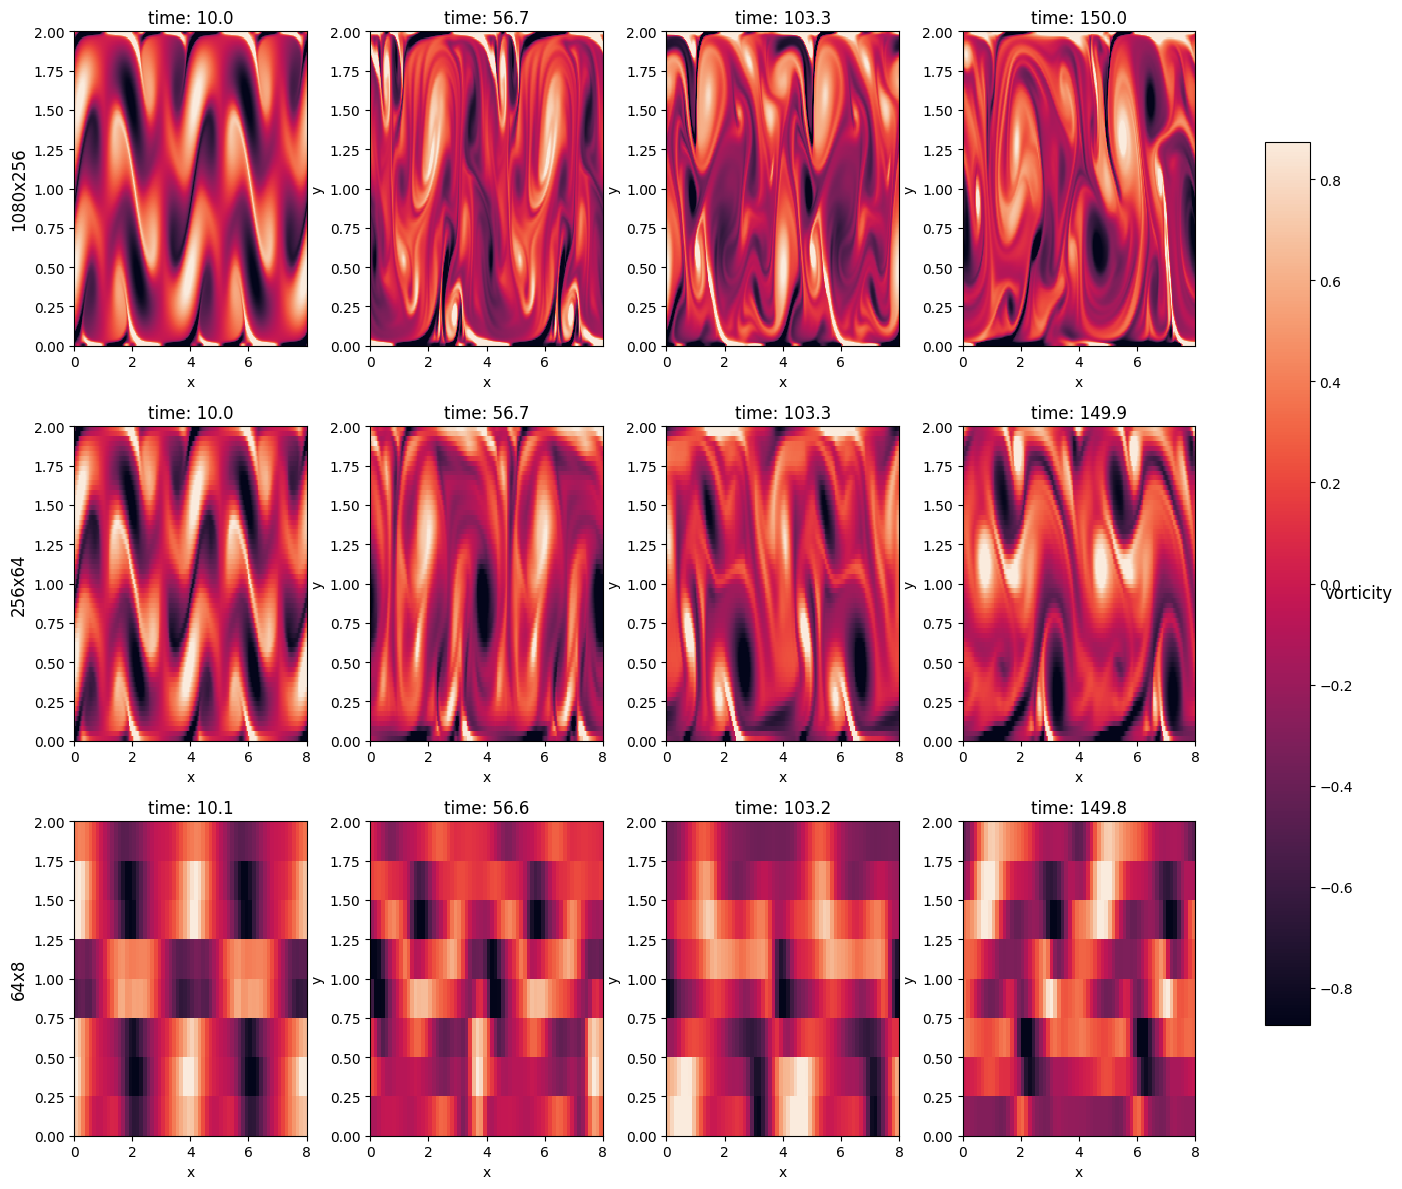

In [45]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'vorticity')

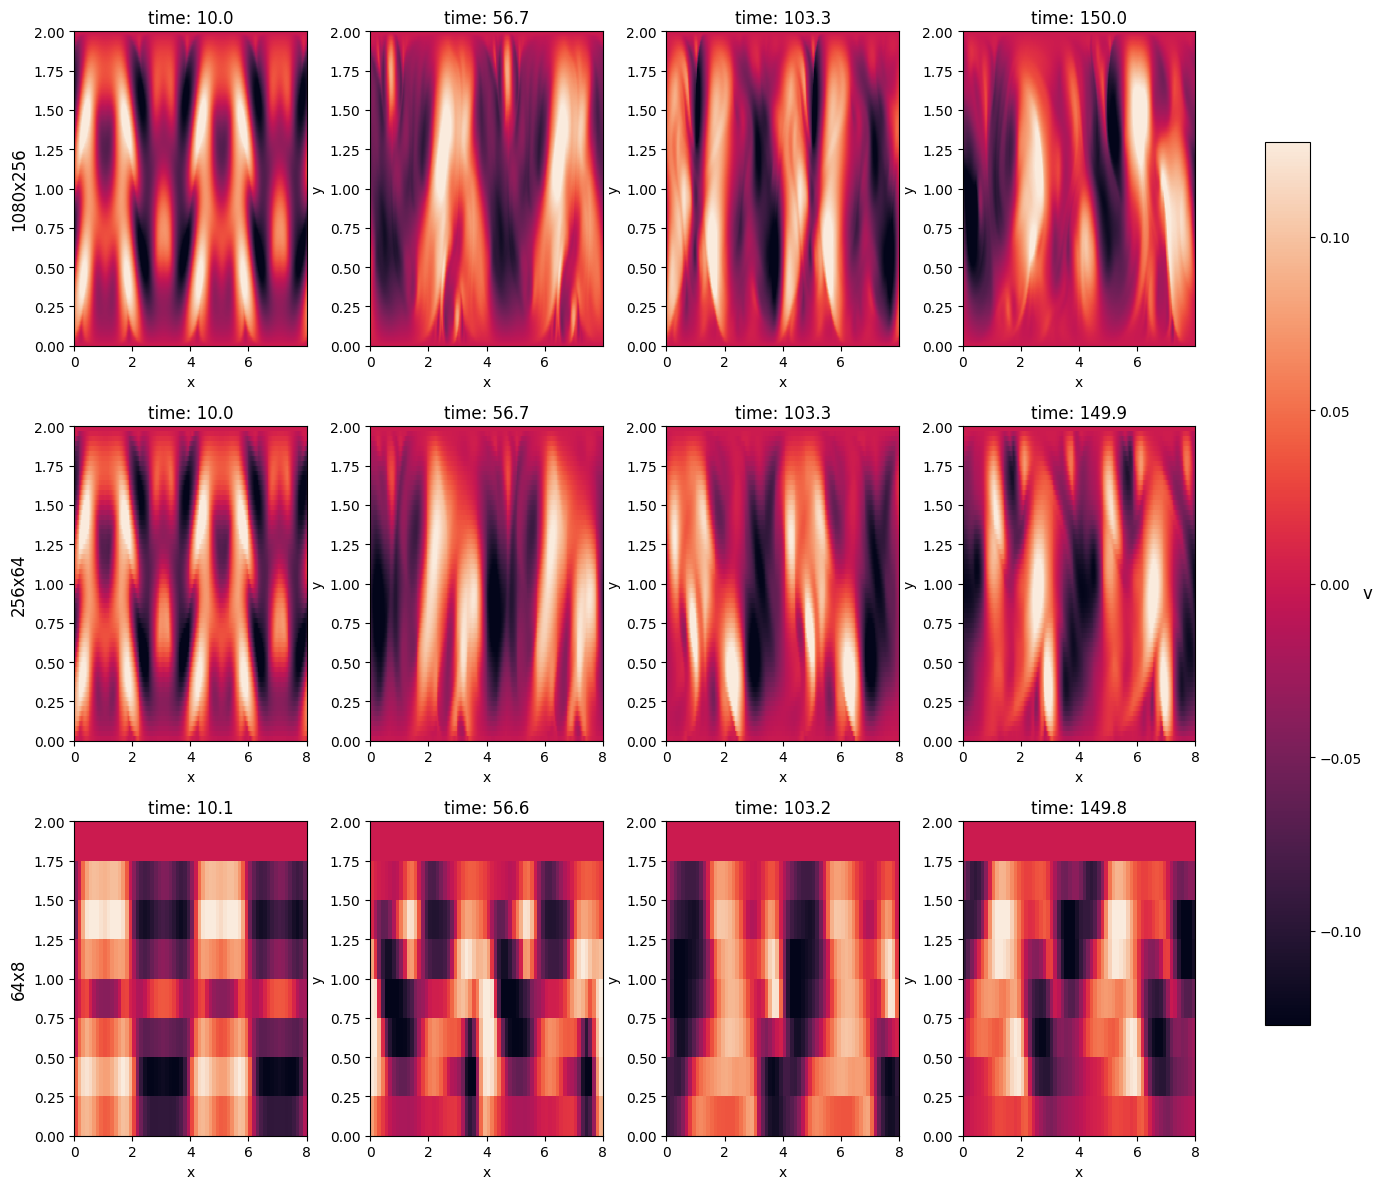

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'v')

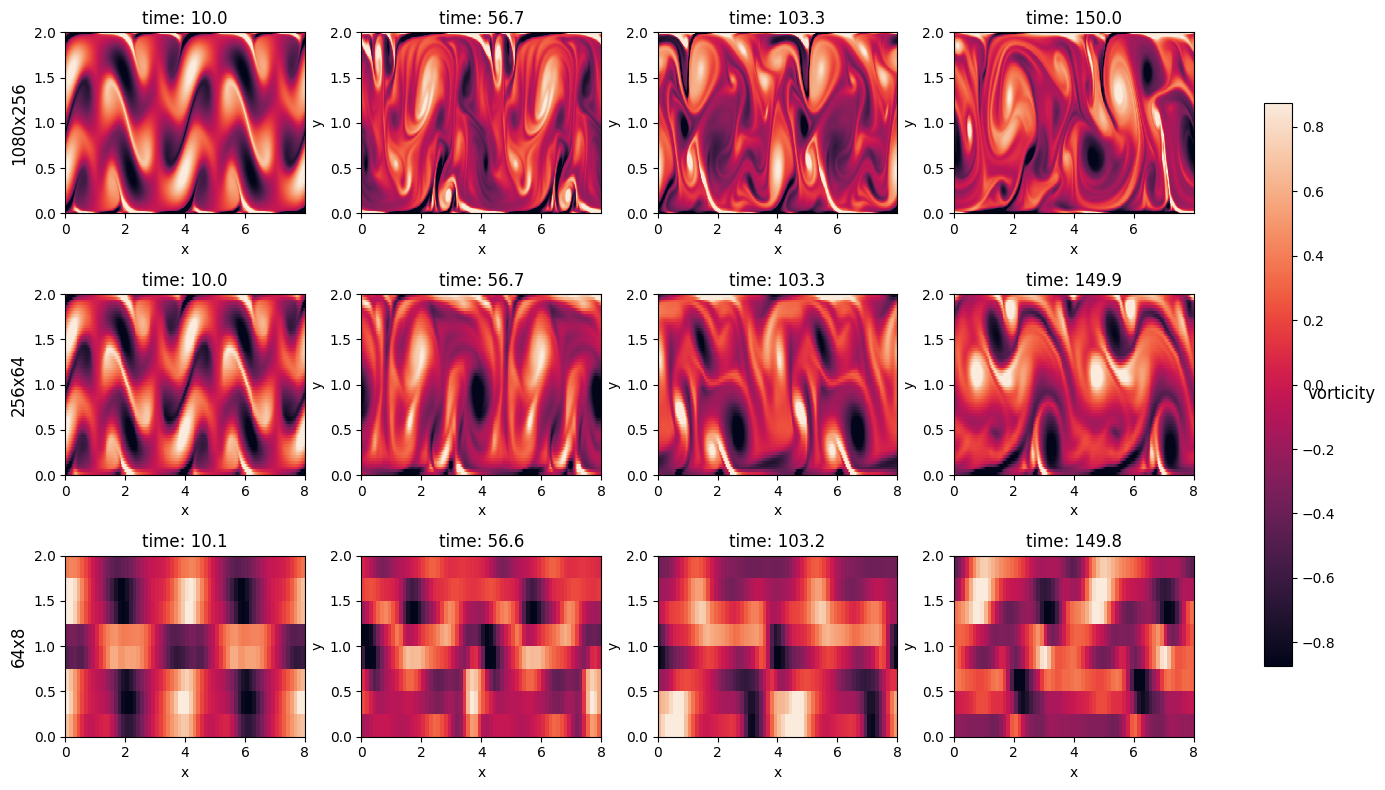

In [49]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'vorticity',figsize=(15,8))